# Seasonal ARIMA 

Our second model is the Seasonal ARIMA model (sometimes abbreviated as SARIMA), which is one of the most widely used time series modeling methods along with Holt-Winters' method. ARIMA models mainly use information from the autocorrelation in the time series data for modeling and forecasting purposes- the idea being that if future values of a variable are be strongly correlated with its past values, then knowing the past values should allow you to make good predictions. The Seasonal ARIMA usually is denoted as _ARIMA(p,d,q)(P,D,Q)m_ where each one of _p, d, q, P, D,_ and _Q_ denotes a different parameter within the model. Before fitting a model, we must determine appropriate values for each of them via a number of methods.

Just like in the previous notebook, we start by loading up our data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SARIMAX

bike = pd.read_csv('./data/rides_monthly_aggregate.csv', usecols = [1])
bike.set_index(pd.period_range('1/1/2013', freq='M', periods=84), inplace = True)

First, we must determine _d_ and _D_ by considering if our data is stationary, and if not, what type of differencing must we apply in order to get stationary data. Given the strong seasonality that we've already identified in our data, we start with seasonally differencing our data to see if it can produce stationary data:

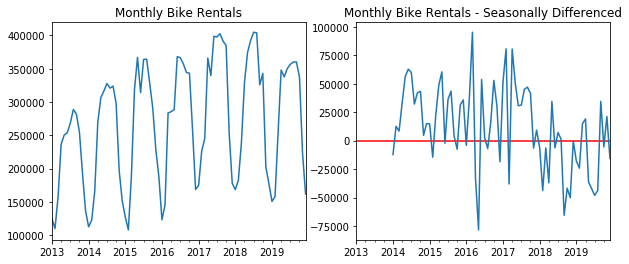

In [2]:
bike['seasonal_diff'] = bike.diff(periods = 12)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig = bike['num_rides'].plot(ax = axes[0], title = "Monthly Bike Rentals")
fig = bike['seasonal_diff'].plot(ax = axes[1], title = "Monthly Bike Rentals - Seasonally Differenced")
axes[1].hlines(0, bike.index[0], bike.index[-1], 'r');

<br>

Above, the plot of the bike rental data is given on the left, while the seasonally differenced data is given on the right. Visually, it seems like seasonal differencing has done well in making our data stationary, so we'll proceed with the ARIMA modeling with a single application of seasonal differencing, so we'll set _d = 0_ and _D = 1_ for our model.

For determining suitable values for _p, q, P,_ and _Q_, we will need to look at the ACF and PACF plots of the seasonally differenced data: